-The gender with the most Nobel laureates is: Male
-The most common birth country of Nobel laureates is: United States of America
-First woman to win a Nobel Prize: Marie Curie, née Sklodowska Category: Physics
-The repeated winners are: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


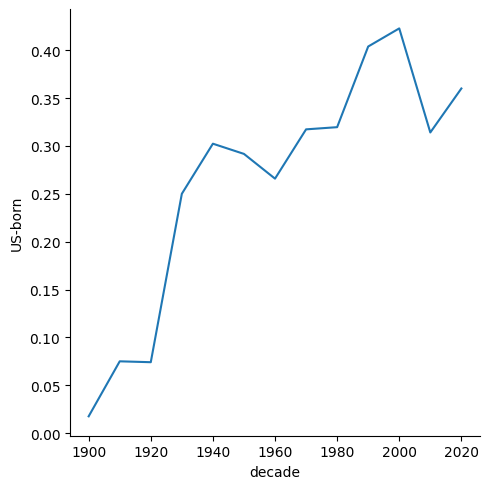

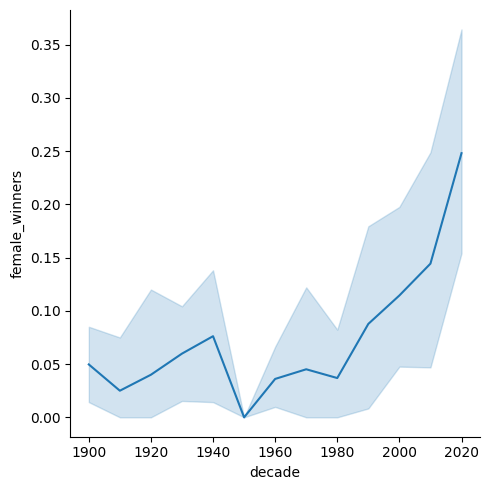

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load Nobel dataset
Nobel = pd.read_csv("data/nobel.csv")

# Find the gender with the most Nobel laureates
top_gender = Nobel["sex"].value_counts().index[0]
# Find the most common birth country of Nobel laureates
top_country = Nobel["birth_country"].value_counts().index[0]
# Print the results
print("-The gender with the most Nobel laureates is:", top_gender)
print("-The most common birth country of Nobel laureates is:", top_country)

# Create a new column to identify US-born Nobel laureates
Nobel["US-born"] = Nobel["birth_country"] == "United States of America"
# Create a new column to group Nobel laureates by decade
Nobel["decade"] = ((Nobel["year"] // 10) * 10).astype(int)
# Calculate the proportion of US-born winners by decade
prop_usa_winners = Nobel.groupby("decade", as_index=False)["US-born"].mean()
# Find the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners["US-born"] == prop_usa_winners["US-born"].max()]["decade"].values[0]
# Visualize the proportion of US-born winners over decades
viz1 = sns.relplot(x="decade", y="US-born", data=prop_usa_winners, kind="line")

# Create a new column to identify female Nobel laureates
Nobel["female_winners"] = Nobel["sex"] == "Female"
# Calculate the proportion of female winners by decade and category
prop_female = Nobel.groupby(["decade", "category"], as_index=False)["female_winners"].mean()
# Find the decade and category with the highest proportion of female winners
max_female = prop_female[prop_female["female_winners"] == prop_female["female_winners"].max()][["decade", "category"]]
max_female_dict = {max_female["decade"].values[0]: max_female["category"].values[0]}
# Visualize the proportion of female winners over decades
viz2 = sns.relplot(x="decade", y="female_winners", data=prop_female, kind="line")

# Find the first woman to win a Nobel Prize
filtered_female_Nobel_winners = Nobel[Nobel["female_winners"]]
first_woman_index = filtered_female_Nobel_winners["year"].idxmin()
first_woman_name = filtered_female_Nobel_winners.loc[first_woman_index, "full_name"]
first_woman_category = filtered_female_Nobel_winners.loc[first_woman_index, "category"]
print("-First woman to win a Nobel Prize:", first_woman_name, "Category:", first_woman_category)

# Find and print the names of repeated Nobel Prize winners
count = Nobel["full_name"].value_counts()
repeats = count[count >= 2].index
repeat_list = list(repeats)
print("-The repeated winners are:", repeat_list)
